Bağımlılıkları İçe Aktarma

In [405]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Veri Toplama

In [406]:
# veri kümesini bir Pandas DataFrame'e yükleme
credit_card_data = pd.read_csv('creditcard.csv')

In [407]:
# veri kümesinin ilk 5 satırı
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [408]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Veri Ön İşleme

In [409]:
# veri kümesi bilgileri
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [410]:
credit_card_data.shape

(284807, 31)

In [411]:
# her sütundaki eksik değerlerin sayısını kontrol etme
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [412]:
# yasal işlemlerin ve hileli işlemlerin dağıtımı
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\ramazan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


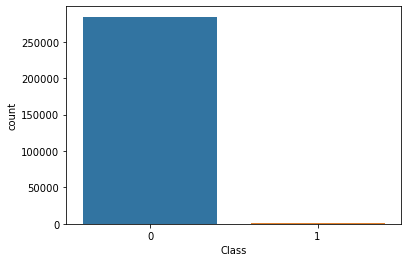

In [413]:
#Hedef Değişkendeki Sınıfların Görselleştirilmesi

sns.countplot(credit_card_data.Class);

Bu Veri Kümesi son derece dengesiz

0 --> Normal İşlem

1 --> hileli işlem

In [414]:
# analiz için verileri ayırma
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [415]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [416]:
# verilerin istatistiksel ölçümleri
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [417]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [418]:
# her iki işlemin değerlerini karşılaştır
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Yetersiz Örnekleme

Hileli İşlem Sayısı --> 492

In [419]:
legit_sample = legit.sample(n=492,random_state=1)

İki DataFrame'i birleştirme

In [420]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [421]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106066,69808.0,0.136174,-1.647766,0.850033,1.576178,-1.569057,-0.106752,0.026632,-0.091738,0.517553,...,0.584649,0.582371,-0.548530,0.456719,0.202315,-0.314320,-0.018220,0.138062,540.00,0
102005,68015.0,-0.911610,0.680815,1.344329,-0.068517,0.596394,-1.268838,0.769226,-0.134888,-0.247848,...,0.139301,0.252879,-0.228605,0.360421,0.043382,-0.588531,-0.026174,0.159864,6.89,0
278450,168231.0,-0.917299,0.860942,1.201170,-0.962314,-0.372495,-0.114847,0.001741,0.699885,-0.040284,...,-0.138630,-0.493530,0.001530,-0.370406,-0.392434,0.304997,0.177416,0.115137,19.99,0
120218,75751.0,1.252596,0.021359,0.044063,0.325909,0.011174,-0.053598,-0.097035,0.013237,0.263268,...,-0.096153,-0.266459,-0.071237,-0.749998,0.389529,0.494047,-0.029793,0.002433,17.80,0
258527,158694.0,-1.109483,1.061341,1.484072,0.923891,-0.137718,0.816640,0.014252,0.938303,-0.125829,...,-0.479951,-1.369632,-0.020618,0.578319,0.329709,-0.825568,0.209439,0.068794,24.48,0


C:\Users\ramazan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


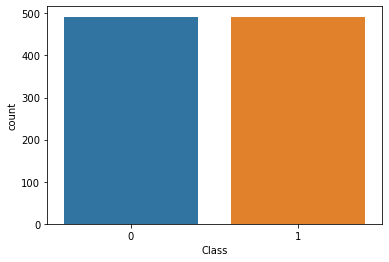

In [446]:
sns.countplot(new_dataset.Class);

In [447]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

# Normalizasyon İşlemi

In [422]:
from sklearn import preprocessing

new_dataset['Time'] = preprocessing.minmax_scale(new_dataset['Time'])
new_dataset['Amount'] = preprocessing.minmax_scale(new_dataset['Amount'])

In [445]:
new_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,0.521734,-2.364619,1.743232,-3.506993,2.280260,-1.575253,-0.668521,-2.750780,0.312665,-1.333917,...,0.349367,-0.008846,-0.024103,-0.059573,0.015420,0.034122,0.088549,0.051257,0.041410,0.500000
std,0.279560,5.528330,3.735836,6.231580,3.215631,4.209624,1.752510,5.868525,4.849720,2.284843,...,2.779431,1.180442,1.168454,0.563083,0.676084,0.473694,0.995770,0.418853,0.096369,0.500254
min,0.000000,-30.552380,-12.040133,-31.103685,-3.566075,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.223230,-7.263482,-1.986332,0.000000,0.000000
25%,0.281895,-2.788129,-0.229387,-5.120349,-0.134686,-1.810494,-1.599839,-3.066415,-0.205095,-2.292523,...,-0.170345,-0.565998,-0.229350,-0.405859,-0.336073,-0.281821,-0.073177,-0.059602,0.000544,0.000000
50%,0.486976,-0.776242,0.860827,-1.397989,1.356204,-0.474459,-0.617714,-0.608199,0.158318,-0.783593,...,0.157435,0.000873,-0.020774,-0.004961,0.056850,-0.009377,0.049262,0.035679,0.006787,0.500000
75%,0.786520,1.013305,2.777569,0.371142,4.305361,0.479624,0.133037,0.288291,0.856881,0.157760,...,0.654740,0.565665,0.196361,0.365721,0.391606,0.354507,0.457194,0.225032,0.035796,1.000000
max,1.000000,2.342858,22.057729,3.277221,12.114672,11.095089,6.474115,6.108224,20.007208,6.325787,...,27.202839,8.361985,5.466230,1.253697,2.208209,2.745261,3.052358,2.292313,1.000000,1.000000


Verileri Özellikler ve Hedefler olarak bölme

In [425]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [426]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
106066  0.403568  0.136174 -1.647766  0.850033  1.576178 -1.569057 -0.106752   
102005  0.393180 -0.911610  0.680815  1.344329 -0.068517  0.596394 -1.268838   
278450  0.973812 -0.917299  0.860942  1.201170 -0.962314 -0.372495 -0.114847   
120218  0.438000  1.252596  0.021359  0.044063  0.325909  0.011174 -0.053598   
258527  0.918556 -1.109483  1.061341  1.484072  0.923891 -0.137718  0.816640   
...          ...       ...       ...       ...       ...       ...       ...   
279863  0.979090 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  0.980278  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  0.980301 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  0.983864 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  0.986077  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [427]:
print(Y)

106066    0
102005    0
278450    0
120218    0
258527    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Verileri Eğitim verileri ve Test Verileri olarak ayırın

In [428]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [429]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Eğitimi

Navie Bayes Algoritması

In [430]:
from sklearn.naive_bayes import GaussianNB
#Naive Bayes Objesi
nb = GaussianNB()
#Modeli Eğitme
model = nb.fit(X_train,Y_train)

In [431]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

<AxesSubplot:>

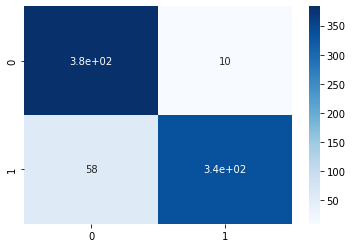

In [432]:
cf_matrix =confusion_matrix(Y_train, X_train_prediction) 
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

In [433]:
print('Eğitim Verilerinde Doğruluk Puanı: ', training_data_accuracy)

Eğitim Verilerinde Doğruluk Puanı:  0.9135959339263025


In [434]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

<AxesSubplot:>

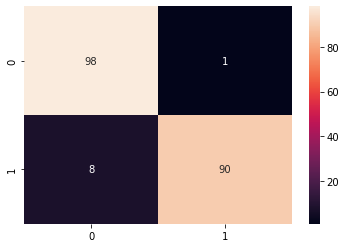

In [435]:
cf_matrix =confusion_matrix(Y_test, X_test_prediction) 
sns.heatmap(cf_matrix, annot=True)

In [436]:
print('Test Verilerinde Doğruluk Puanı : ', test_data_accuracy)

Test Verilerinde Doğruluk Puanı :  0.9543147208121827


# GELİŞTİRME 

Logistic Regresyon 

In [437]:
model = LogisticRegression()

In [438]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Değerlendirmesi

Doğruluk Puanı

In [439]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

<AxesSubplot:>

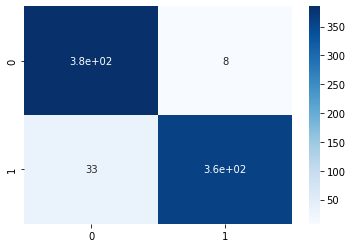

In [440]:
cf_matrix =confusion_matrix(Y_train, X_train_prediction) 
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

In [441]:
print('Eğitim Verilerinde Doğruluk Puanı: ', training_data_accuracy)

Eğitim Verilerinde Doğruluk Puanı:  0.9479034307496823


In [442]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

<AxesSubplot:>

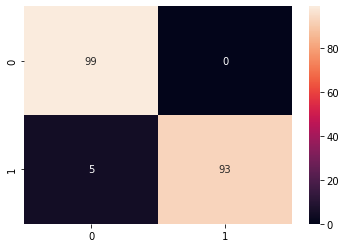

In [443]:
cf_matrix =confusion_matrix(Y_test, X_test_prediction) 
sns.heatmap(cf_matrix, annot=True)

In [444]:
print('Test Verilerinde Doğruluk Puanı : ', test_data_accuracy)

Test Verilerinde Doğruluk Puanı :  0.9746192893401016
